<a href="https://colab.research.google.com/github/kthom93/AdventOfCode2019/blob/master/Day19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tractor Beam

# Part 1

In [0]:
code = [109,424,203,1,21102,11,1,0,1105,1,282,21101,0,18,0,1105,1,259,2102,1,1,221,203,1,21102,1,31,0,1105,1,282,21102,1,38,0,1105,1,259,21002,23,1,2,21201,1,0,3,21101,0,1,1,21102,57,1,0,1105,1,303,2102,1,1,222,21002,221,1,3,21001,221,0,2,21102,1,259,1,21102,80,1,0,1105,1,225,21102,59,1,2,21102,1,91,0,1105,1,303,1202,1,1,223,21001,222,0,4,21102,259,1,3,21102,1,225,2,21101,225,0,1,21101,118,0,0,1105,1,225,21002,222,1,3,21102,1,112,2,21101,0,133,0,1105,1,303,21202,1,-1,1,22001,223,1,1,21101,148,0,0,1105,1,259,1201,1,0,223,20102,1,221,4,21002,222,1,3,21102,1,18,2,1001,132,-2,224,1002,224,2,224,1001,224,3,224,1002,132,-1,132,1,224,132,224,21001,224,1,1,21101,0,195,0,106,0,108,20207,1,223,2,21001,23,0,1,21102,1,-1,3,21102,1,214,0,1105,1,303,22101,1,1,1,204,1,99,0,0,0,0,109,5,2101,0,-4,249,22101,0,-3,1,21202,-2,1,2,21201,-1,0,3,21101,250,0,0,1105,1,225,22101,0,1,-4,109,-5,2105,1,0,109,3,22107,0,-2,-1,21202,-1,2,-1,21201,-1,-1,-1,22202,-1,-2,-2,109,-3,2106,0,0,109,3,21207,-2,0,-1,1206,-1,294,104,0,99,21202,-2,1,-2,109,-3,2105,1,0,109,5,22207,-3,-4,-1,1206,-1,346,22201,-4,-3,-4,21202,-3,-1,-1,22201,-4,-1,2,21202,2,-1,-1,22201,-4,-1,1,22102,1,-2,3,21101,343,0,0,1106,0,303,1105,1,415,22207,-2,-3,-1,1206,-1,387,22201,-3,-2,-3,21202,-2,-1,-1,22201,-3,-1,3,21202,3,-1,-1,22201,-3,-1,2,22102,1,-4,1,21101,384,0,0,1105,1,303,1105,1,415,21202,-4,-1,-4,22201,-4,-3,-4,22202,-3,-2,-2,22202,-2,-4,-4,22202,-3,-2,-3,21202,-4,-1,-2,22201,-3,-2,1,22102,1,1,-4,109,-5,2106,0,0]

In [0]:
import copy as cp
import matplotlib.pyplot as plt

In [0]:
def plotImage(image):
  plt.imshow(image, cmap='Greys')
  plt.show()

def extendCode(code):
  for _ in range(3000):
    code.append(0)
  return code

def intCode(code, pos=0, rel=0, inputs=[]):
  def getValue(mode, code, pos, rel):
    if mode == 0:
      return code[code[pos]]
    elif mode == 1:
      return code[pos]
    elif mode == 2:
      return code[code[pos] + rel]
    else:
      print("Unknown Mode: %i" %mode)

  def readParams(params):
    modes = []
    for i in range(3):
      modes.append(params % 10)
      params = params // 10
    return modes

  def writeValue(mode, code, value, pos, rel):
    if mode == 0:
      code[code[pos]] = value
    elif mode == 1:
      code[pos] = value
    elif mode == 2:
      code[code[pos] + rel] = value
    else:
      print("Unknown Mode: %i" %mode)

  output = []
  while code[pos] != 99:
    com = code[pos] % 100
    params = code[pos] // 100
    modes = readParams(params)

    if com == 1 or com == 2:
      left = getValue(modes[0], code, pos+1, rel)
      right = getValue(modes[1], code, pos+2, rel)

      if com == 1:
        answer = left + right
      elif com == 2:
        answer = left * right
      
      writeValue(modes[2], code, answer, pos+3, rel)

      pos += 4
    
    elif com == 3:
      if len(inputs) == 0:
        return output, code, pos, rel, False
      value = inputs[0]
      inputs.remove(value)
      writeValue(modes[0], code, value, pos+1, rel)
      pos += 2
    
    elif com == 4:
      output.append(getValue(modes[0], code, pos+1, rel))
      pos += 2

    elif com == 5 or com == 6:
      value = getValue(modes[0], code, pos+1, rel)
      
      if (com == 5 and value != 0) or (com == 6 and value == 0):
        pos = getValue(modes[1], code, pos+2, rel)
      else:
        pos += 3

    elif com == 7 or com == 8:
      left = getValue(modes[0], code, pos+1, rel)
      right = getValue(modes[1], code, pos+2, rel)
      
      if (com == 7 and left < right) or (com == 8 and left == right):
        writeValue(modes[2], code, 1, pos+3, rel)
      else:
        writeValue(modes[2], code, 0, pos+3, rel)
      pos += 4
    
    elif com == 9:
      rel += getValue(modes[0], code, pos+1, rel)
      pos += 2

    else:
      print(com)
      print("Error!!!")
      return None
  return output, code, 0, 0, True

In [0]:
def createGrid(width, height):
  grid = []
  for y in range(height):
    row = []
    for x in range(width):
      row.append(0)
    grid.append(row)
  return grid

def areaPulled(code, grid):
  count = 0
  for y in range(len(grid)):
    for x in range(len(grid[0])):
      output, c, p, r, f = intCode(cp.copy(code), inputs=[x, y])
      grid[y][x] = output[0]
      count += output[0]
  plotImage(grid)
  return count

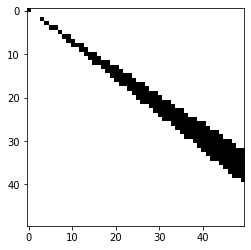

199


In [24]:
grid = createGrid(50, 50)
extCode = extendCode(cp.copy(code))

print(areaPulled(extCode, grid))

## Part 2

In [0]:
def check(x, y, code, size):

  for i in range(size):
    output, c, p, r, f = intCode(cp.copy(code), inputs=[x + i, y])
    if output[0] == 0:
      return False
    output, c, p, r, f = intCode(cp.copy(code), inputs=[x, y + i])
    if output[0] == 0:
      return False
  return True

def findPoint(code, size):
  x = 0
  # Did a manual search for the y
  # Takes a lot longer if y = 0
  y = 726

  started = False
  startx = 0

  while True:
    x = startx
    started = False
    while True:
      output, c, p, r, f = intCode(cp.copy(code), inputs=[x, y])
      if output[0] == 1:
        if not started:
          startx = x
          started = True
        if check(x, y, code, size):
          return (x * 10000) + y
      elif started:
        break
      x += 1
    y += 1
  
def p(code, size):
  for y in range(len(grid)):
    row = ''
    for x in range(len(grid[0])):
      output, c, p, r, f = intCode(cp.copy(code), inputs=[x, y])
      if x == 35 and y == 25:
        row += 'X'
      else:
        row += str(output[0])
    print(row)

In [98]:
extCode = extendCode(cp.copy(code))


print(findPoint(extCode, 100))

10180726
